<a href="https://colab.research.google.com/github/Sparsh16789/Image_Generation/blob/main/Image_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install diffusers transformers accelerate

In [7]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

In [8]:
model_id="dreamlike-art/dreamlike-diffusion-1.0"

pipeline=StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, use_safetensors=True)
pipeline=pipeline.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [9]:
def generate_image(pipeline, prompt, params):
  img=pipeline(prompt, **params).images

  num_images=len(img)
  if num_images>1:
    fig, axs=plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      axs[i].imshow(img[i])
      axs[i].axis('off')

  else:
    fig=plt.figure()
    plt.imshow(img[0])
    plt.axis('off')
  plt.tight_layout()

  0%|          | 0/100 [00:00<?, ?it/s]

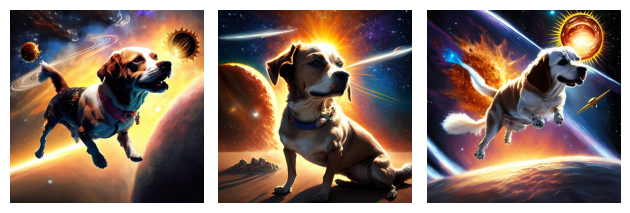

In [10]:
prompt="dog flying in outer space near sun, realistic"
params={'num_inference_steps':100, 'width':512, 'num_images_per_prompt':3}
generate_image(pipeline, prompt, params)